## Reto 3: Gráficas de Dispersión

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de dispersión
    - Utilizar gráficas de dispersión para complementar el análisis hecho con la matriz de correlación
 
---
    
### 2. Desarrollo:

Espero que haya quedado claro en el Ejemplo pasado que las gráficas de dispersión pueden ser extremadamente útiles para encontrar incosistencias, errores y valores atípicos en nuestro dataset.

Vamos a complementar el análisis realizado en el Reto pasado con unas gráficas de dispersión. El objetivo de este Reto es utilizar todas las herramientas que hemos acumulado hasta el momento para preparar nuestro dataset para realizar predicciones con él. Vamos a volver a utilizar el dataset 'wine_quality_red-clean.csv'. Realiza los siguientes pasos:

1. Vuelve a generar tu matriz de correlaciones para tenerla disponible
2. Realiza gráficas de dispersión de los pares de variables que parezcan más prometedores (en los que la fuerza de la correlación sea más fuerte)
3. También realiza gráficas de dispersión de los pares de variables que no tengan un coeficiente de correlación alto, **pero** que tú creas intuitivamente que *deberían* de tener una correlación.
4. Utilizando estas gráficas de dispersión, y complementando el análisis con promedios, medianas, desviación estándar, boxplots e histogramas, elimina del dataset los valores que consideres como atípicos.
5. Crea una nueva matriz de correlación para ver si tus coeficientes han sido modificados o no.
6. Comenta con tus compañeros y la experta tus hallazgos.

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df_wine = pd.read_csv('https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/master/Datasets/wine_quality_red-clean.csv', index_col=0)

In [4]:
df_wine['quality'] = df_wine['quality'].astype('category')
wine_numeric = df_wine.select_dtypes(include=['float64', 'int64'])

In [19]:
def heat_map_cor(df):
    corr_matrix = df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Mapa de Calor de Correlación para Variables Numéricas", fontsize=16)
    plt.xlabel("Variables Numéricas")
    plt.ylabel("Variables Numéricas")
    plt.show()

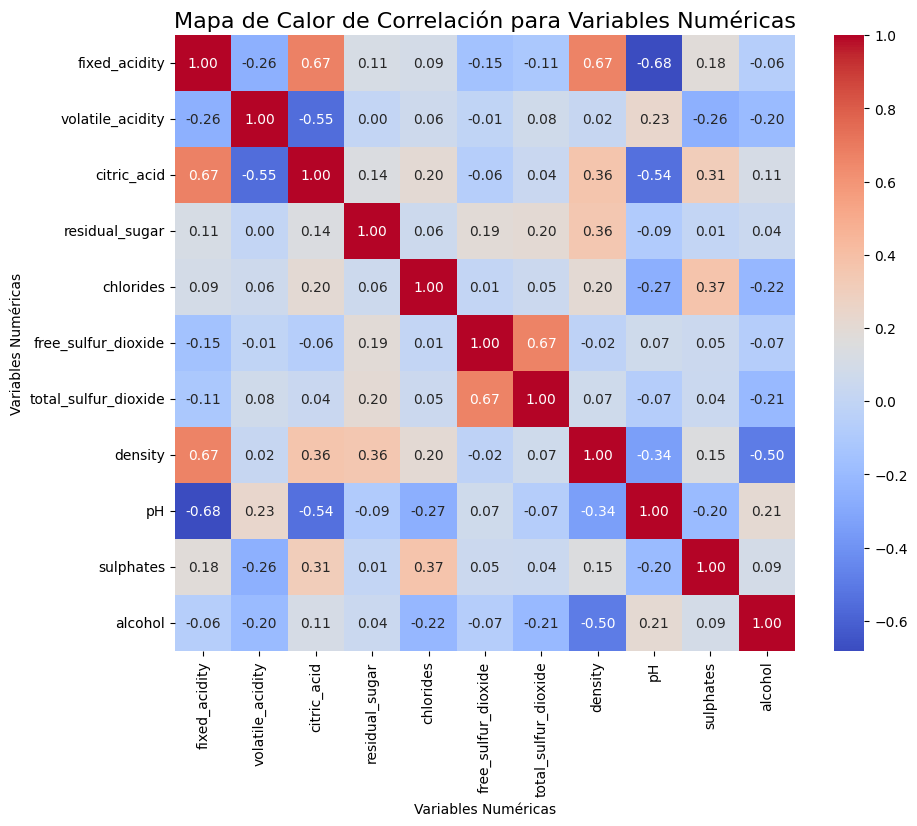

In [20]:
heat_map_cor(wine_numeric)

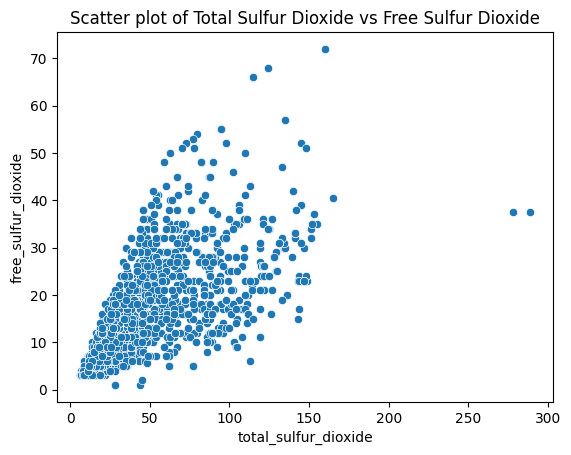

In [9]:
sns.scatterplot(data=wine_numeric, x='total_sulfur_dioxide', y='free_sulfur_dioxide')
plt.title('Scatter plot of Total Sulfur Dioxide vs Free Sulfur Dioxide')
plt.show()

In [12]:
# 2

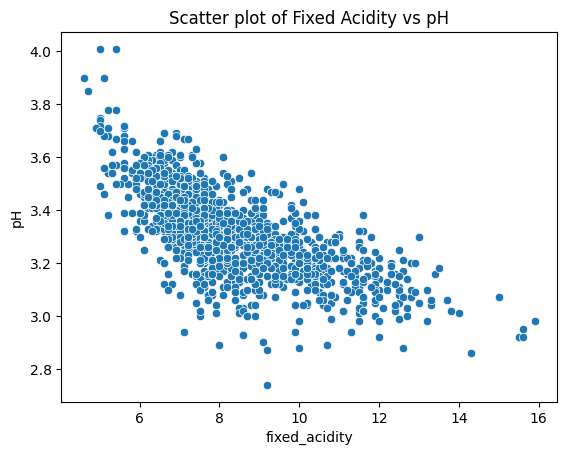

In [10]:
sns.scatterplot(data=wine_numeric, x='fixed_acidity', y='pH')
plt.title('Scatter plot of Fixed Acidity vs pH')
plt.show()


In [ ]:
# 3

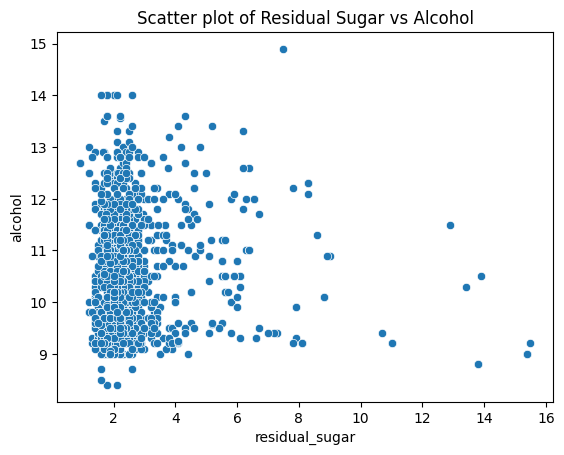

In [13]:
sns.scatterplot(x='residual_sugar', y='alcohol', data=wine_numeric)
plt.title('Scatter plot of Residual Sugar vs Alcohol')
plt.show()

In [ ]:
# 4

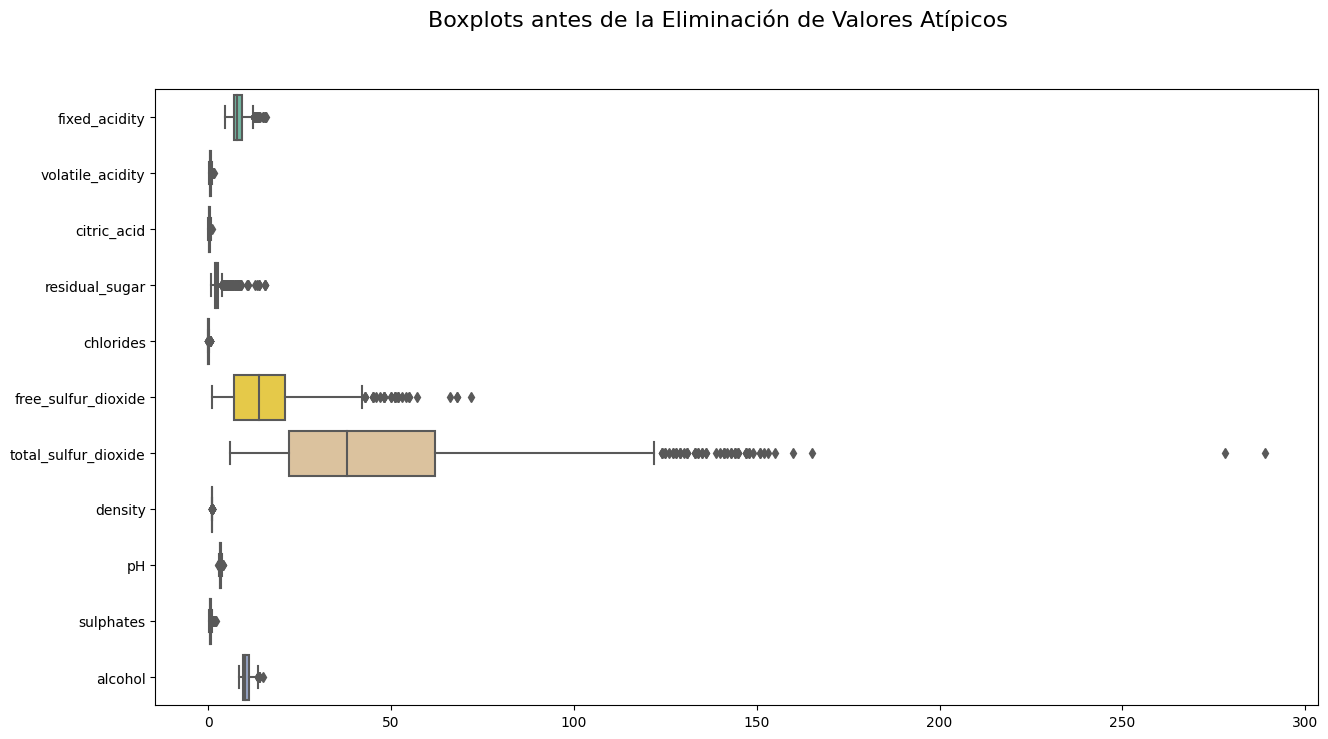

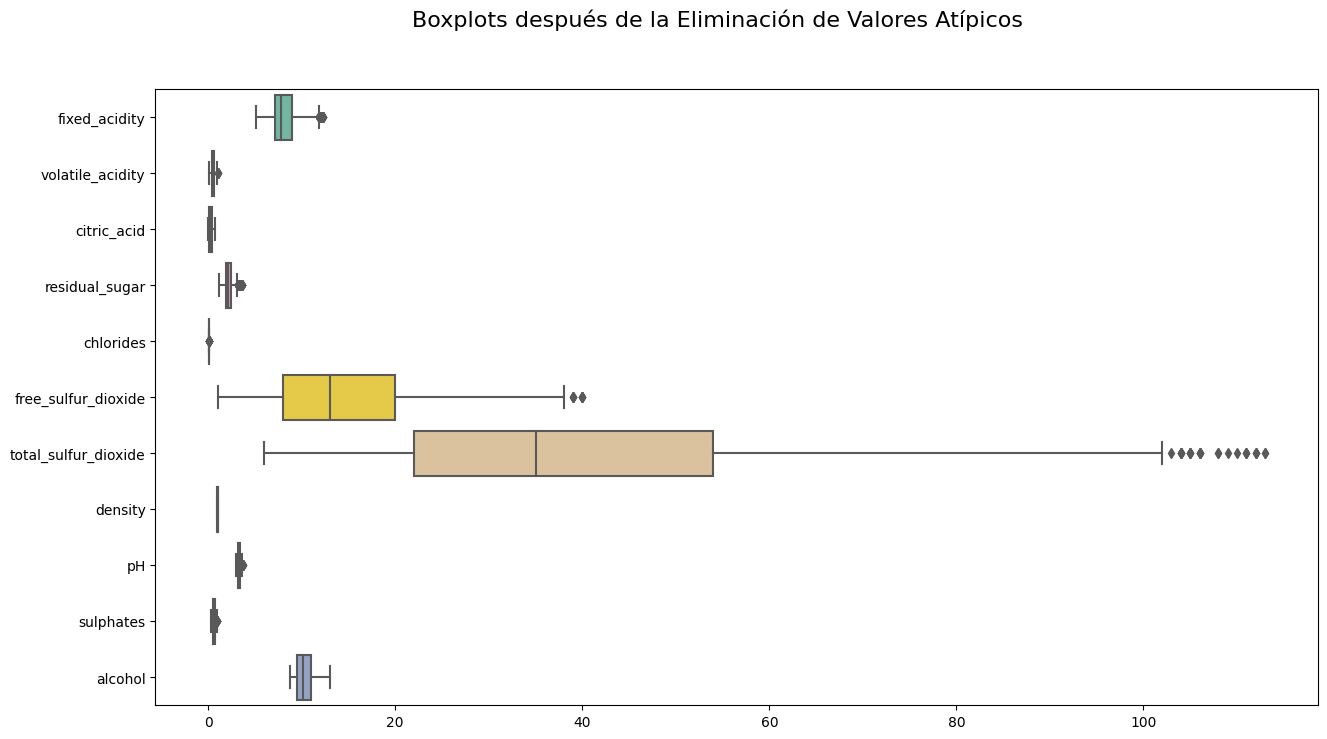

In [17]:
plt.figure(figsize=(15, 8))
plt.suptitle('Boxplots antes de la Eliminación de Valores Atípicos', fontsize=16)
sns.boxplot(data=wine_numeric, orient='h', palette='Set2')
plt.show()

df_limpio = wine_numeric.copy()
for columna in df_limpio.select_dtypes(include='number').columns:
    Q1 = df_limpio[columna].quantile(0.25)
    Q3 = df_limpio[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df_limpio[columna] >= (Q1 - 1.5 * IQR)) & (df_limpio[columna] <= (Q3 + 1.5 * IQR))
    df_limpio = df_limpio.loc[filtro]

plt.figure(figsize=(15, 8))
plt.suptitle('Boxplots después de la Eliminación de Valores Atípicos', fontsize=16)
sns.boxplot(data=df_limpio, orient='h', palette='Set2')
plt.show()

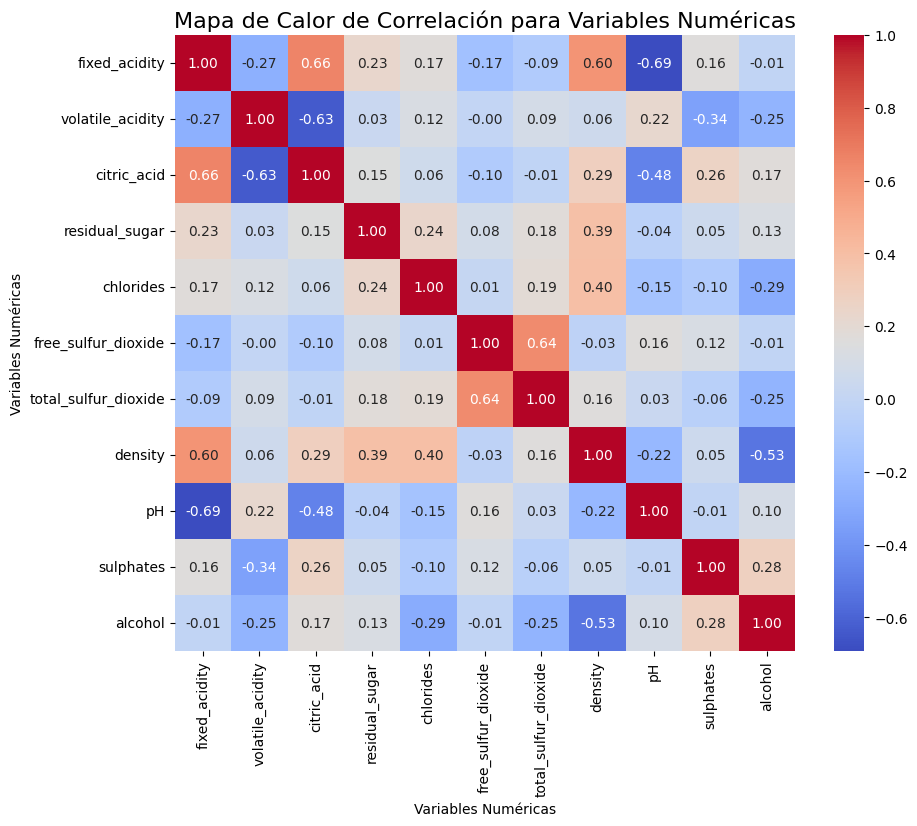

In [21]:
heat_map_cor(df_limpio)

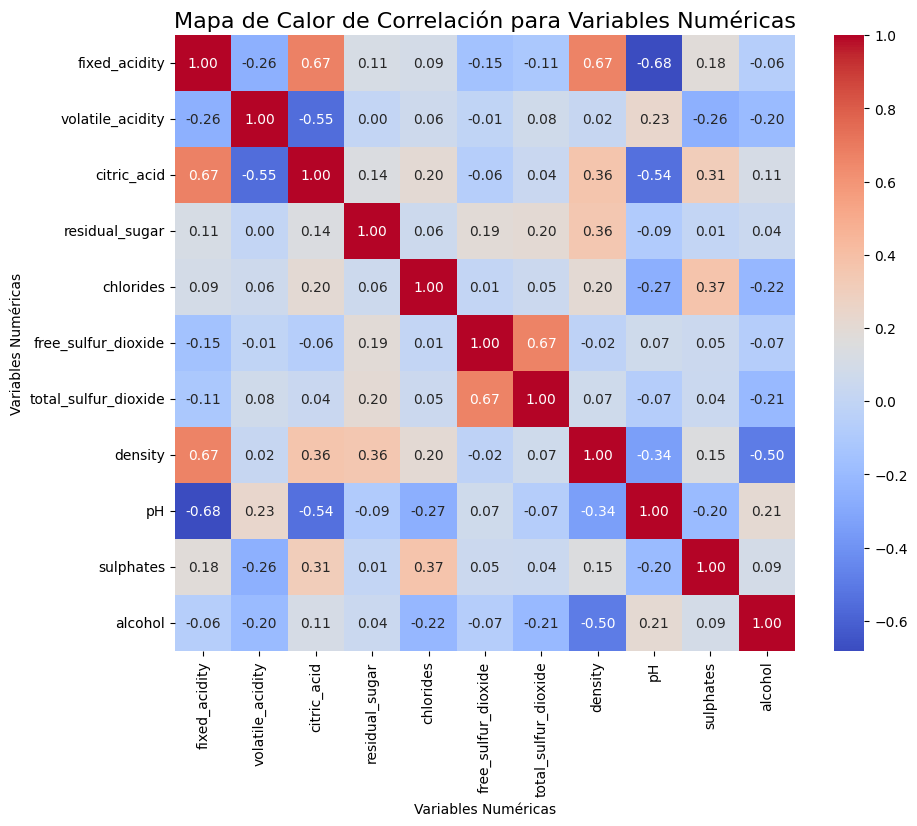

In [22]:
heat_map_cor(wine_numeric)

In [23]:
wine_numeric.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [24]:
df_limpio.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.269133,0.659201,0.226868,0.168894,-0.168601,-0.091282,0.597415,-0.692961,0.160282,-0.011738
volatile_acidity,-0.269133,1.000000,-0.633684,0.028325,0.120929,-0.002098,0.091410,0.059705,0.224428,-0.337451,-0.247386
citric_acid,0.659201,-0.633684,1.000000,0.151078,0.063009,-0.095014,-0.014289,0.291809,-0.475585,0.264897,0.168657
residual_sugar,0.226868,0.028325,0.151078,1.000000,0.235123,0.081341,0.175609,0.388476,-0.043130,0.048965,0.126587
chlorides,0.168894,0.120929,0.063009,0.235123,1.000000,0.014543,0.192909,0.395286,-0.151296,-0.095866,-0.285840
free_sulfur_dioxide,-0.168601,-0.002098,-0.095014,0.081341,0.014543,1.000000,0.635157,-0.027314,0.160725,0.116513,-0.011702
total_sulfur_dioxide,-0.091282,0.091410,-0.014289,0.175609,0.192909,0.635157,1.000000,0.160564,0.032302,-0.057296,-0.247777
density,0.597415,0.059705,0.291809,0.388476,0.395286,-0.027314,0.160564,1.000000,-0.217487,0.054299,-0.527837
pH,-0.692961,0.224428,-0.475585,-0.043130,-0.151296,0.160725,0.032302,-0.217487,1.000000,-0.006881,0.097760
sulphates,0.160282,-0.337451,0.264897,0.048965,-0.095866,0.116513,-0.057296,0.054299,-0.006881,1.000000,0.281237


### Cambios en las Matrices de Correlación

Después de quitar los valores raros, las relaciones entre algunas de tus variables se intensificaron un poquito. Por ejemplo, la conexión entre `fixed_acidity` y `volatile_acidity` se volvió un poco más fuerte en sentido negativo. En general, las correlaciones se ajustaron un poco, mostrando probablemente una imagen más precisa de cómo se relacionan realmente las variables entre sí.

### ¿Es Buena Idea Eliminar los Valores Atípicos?

Es complicado. Eliminar esos valores raros puede limpiar tus datos y hacer que tus análisis sean más estables, pero también tiene sus contras:

- **Perder Información:** Esos valores atípicos podrían ser información importante. A veces, lo más interesante está en lo inusual.

- **Realidad Distorsionada:** Al sacarlos, podrías estar creando una versión demasiado "limpia" de tus datos que no refleja la realidad.

- **No Siempre Son Errores:** No todos los valores atípicos son errores o ruido; algunos son reales y significativos.
